If you use this code please reference:

*   List item
*   List item


Mahmoodi, Korosh, Bruce J. West, and Paolo Grigolini. "Self-organizing complex networks: individual versus global rules." Frontiers in physiology 8 (2017): 478.


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt



In [2]:
TimeStep = 1 * 10**6   # number of trials; length of the simulation

# parameters of the Prisoner's Dilemma game
s = 0
b = 1.5 # b = 1 + 0.5 ; temptation to cheat = 0.5

K0 = 0  # initial value for the control parameters of the agents
CC = 0.25 # coeficient connecting the two last payoffs (feedback) to the change of the agent's control parameter
g000 = 0.1 # coeficient of the rate in the decision making process

MM = 5 # number of agents on x-axis of the 2D lattice
NN = 7 # number of agents on y-axis of the 2D lattice



In [3]:
Selfk1010 = np.zeros(TimeStep) # records the evolution of the control parameter of a single agent at each trial
SelfkAve = np.zeros(TimeStep)  # records the average of the control parameter of the agents at each trial
X = np.zeros(TimeStep)         # mean field (considering states C as +1 and D as -1)
PiT = np.zeros(TimeStep)       # average of the payoffs at each trial

SelfK1 = np.full((MM, NN), K0) # matrix of previous valuse of the control parameters
Selfk2 = np.zeros((MM, NN))    # updated control parameters
Pi1 = np.zeros((MM, NN))       # previous payoffs
Pi2 = np.zeros((MM, NN))       # current payoffs
Vote = np.zeros((MM, NN))      # state of the agens; C (1) or D (0)
g = np.zeros((MM, NN))         # number of agents in state C (1) around a given agent on the 2D lattice


In [4]:


# Setting Initial Condition
for ih in range(MM):
    for jh in range(NN):
        r = random.random()
        if r < 0.5:
            Vote[ih, jh] = 0
        else:
            Vote[ih, jh] = 1

Alt2 = np.count_nonzero(Vote == 1)
Self2 = np.count_nonzero(Vote == 0)
X[0] = (Alt2 - Self2) / (MM * NN)

for ia in range(MM):
    for ja in range(NN):
        SelfK1[ia, ja] = K0

for i in range(1, MM - 1):
    for j in range(1, NN - 1):
        g[i, j] = Vote[i - 1, j] + Vote[i + 1, j] + Vote[i, j - 1] + Vote[i, j + 1]

for i in range(1, MM - 1):
    g[i, 0] = Vote[i - 1, 0] + Vote[i + 1, 0] + Vote[i, NN - 1] + Vote[i, 1]

for i in range(1, MM - 1):
    g[i, NN - 1] = Vote[i - 1, NN - 1] + Vote[i + 1, NN - 1] + Vote[i, NN - 2] + Vote[i, 0]

for j in range(1, NN - 1):
    g[0, j] = Vote[MM - 1, j] + Vote[1, j] + Vote[0, j - 1] + Vote[0, j + 1]

g[0, 0] = Vote[MM - 1, 0] + Vote[1, 0] + Vote[0, NN - 1] + Vote[0, 1]
g[MM - 1, 0] = Vote[MM - 2, 0] + Vote[0, 0] + Vote[MM - 1, NN - 1] + Vote[MM - 1, 1]
g[0, NN - 1] = Vote[MM - 1, NN - 1] + Vote[1, NN - 1] + Vote[0, NN - 2] + Vote[0, 0]
g[MM - 1, NN - 1] = Vote[MM - 2, NN - 1] + Vote[0, NN - 1] + Vote[MM - 1, NN - 2] + Vote[MM - 1, 0]

for ii in range(MM):
    for j0 in range(NN):
        G = g[ii, j0]
        if Vote[ii, j0] == 1:
            Pi1[ii, j0] = G * (1) + (4 - G) * (-s)
        else:
            Pi1[ii, j0] = G * (b)

        PiT[0] += Pi1[ii, j0]

PiT[0] = PiT[0] / (1 * MM * NN)

# End of initial conditions


In [5]:


for ti in range(1, TimeStep):
    # Total Cooperators (mean field)
    Alt2 = np.sum(Vote == 1)
    Self2 = np.sum(Vote == 0)
    X[ti] = (Alt2 - Self2) / (MM * NN)

    # Counting 4 Neighbors
    g[1:MM - 1, 1:NN - 1] = Vote[0:MM - 2, 1:NN - 1] + Vote[2:MM, 1:NN - 1] + \
                            Vote[1:MM - 1, 0:NN - 2] + Vote[1:MM - 1, 2:NN]

    g[1:MM - 1, 0] = Vote[0:MM - 2, 0] + Vote[2:MM, 0] + Vote[1:MM - 1, NN - 1] + Vote[1:MM - 1, 1]
    g[1:MM - 1, NN - 1] = Vote[0:MM - 2, NN - 1] + Vote[2:MM, NN - 1] + Vote[1:MM - 1, NN - 2] + Vote[1:MM - 1, 0]
    g[0, 1:NN - 1] = Vote[MM - 1, 1:NN - 1] + Vote[1, 1:NN - 1] + Vote[0, 0:NN - 2] + Vote[0, 2:NN]
    g[MM - 1, 1:NN - 1] = Vote[MM - 2, 1:NN - 1] + Vote[0, 1:NN - 1] + Vote[MM - 1, 0:NN - 2] + Vote[MM - 1, 2:NN]

    g[0, 0] = Vote[MM - 1, 0] + Vote[1, 0] + Vote[0, NN - 1] + Vote[0, 1]
    g[MM - 1, 0] = Vote[MM - 2, 0] + Vote[0, 0] + Vote[MM - 1, NN - 1] + Vote[MM - 1, 1]
    g[0, NN - 1] = Vote[MM - 1, NN - 1] + Vote[1, NN - 1] + Vote[0, NN - 2] + Vote[0, 0]
    g[MM - 1, NN - 1] = Vote[MM - 2, NN - 1] + Vote[0, NN - 1] + Vote[MM - 1, NN - 2] + Vote[MM - 1, 0]

    # Prisoner's Dilemma GAME
    G = g.copy()
    G[Vote == 1] = G[Vote == 1] * (1) + (4 - G[Vote == 1]) * (-s)
    G[Vote == 0] = G[Vote == 0] * (b)
    Pi2 = G

    PiT[ti] = np.mean(Pi2)

    # New Vote DMM
    g0 = g.copy()
    kc = SelfK1.copy()
    BBBB = np.exp(kc * (1 - 0.5 * g0))
    a1to0 = g000 * BBBB
    a0to1 = g000 / BBBB

    r = np.random.rand(*a1to0.shape)
    Vote[np.logical_and(Vote == 1, r <= a1to0)] = 0
    r = np.random.rand(*a0to1.shape)
    Vote[np.logical_and(Vote == 0, r <= a0to1)] = 1

    SelfkAv = np.sum(SelfK1)
    SelfkAve[ti] = SelfkAv / (MM * NN)
    Selfk1010[ti] = SelfK1[1, 1]

    # New K
    mask = Pi1 == Pi2
    Selfk2 = np.where(mask, 1 * SelfK1, SelfK1 + CC * (Pi2 - Pi1) / (Pi2 + Pi1))
    mask = (Selfk2 <= 0) | (g000 * np.exp(Selfk2) > 1) | (g000 / np.exp(Selfk2) > 1)
    Selfk2[mask] = SelfK1[mask]

    # Changing old parameters with new ones
    SelfK1 = Selfk2.copy()
    Pi1 = Pi2.copy()

<ipython-input-5-b4da185fa89a>:47: RuntimeWarning: invalid value encountered in divide
  Selfk2 = np.where(mask, 1 * SelfK1, SelfK1 + CC * (Pi2 - Pi1) / (Pi2 + Pi1))


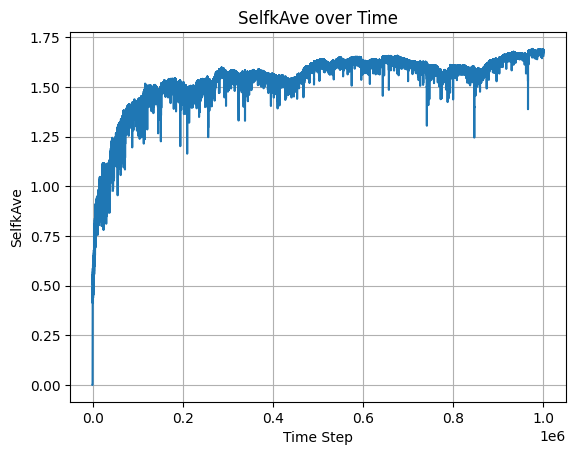

In [6]:
plt.plot(SelfkAve)
plt.xlabel('Time Step')
plt.ylabel('SelfkAve')
plt.title('SelfkAve over Time')
plt.grid(True)
plt.show()